# Wine Quality ML Problem

## Problem statement & Data Description

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests

Additional Information

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   
Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)
   
Data Source
https://archive.ics.uci.edu/dataset/186/wine+quality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_red = pd.read_csv('winequality-red.csv')
df_white = pd.read_csv('winequality-white.csv')

## Data exploration

In [3]:
df_red.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [4]:
df_white.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


df_red and df_white dataframes are not ueable in current form due to all data being in a singel column, hence
the data will be split into multiple columns

In [5]:
# Function to split the values in the column
def split_column_values(row):
    return row.split(";")

In [6]:
# Create column name list
col_list = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
                      "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
                      "pH", "sulphates", "alcohol", "quality"]

# Apply the split_column_values function to each row of the column and store the result in a new dataframe
split_data_red = df_red[df_red.columns[0]].apply(split_column_values).apply(pd.Series)

# Rename the columns
split_data_red.columns = col_list

split_data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [7]:
# Apply the split_column_values function to each row of the column & store the result in a new dataframe
split_data_white = df_white[df_white.columns[0]].apply(split_column_values).apply(pd.Series)

# Rename the columns
split_data_white.columns = col_list

split_data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


In [8]:
split_data_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fixed acidity         1599 non-null   object
 1   volatile acidity      1599 non-null   object
 2   citric acid           1599 non-null   object
 3   residual sugar        1599 non-null   object
 4   chlorides             1599 non-null   object
 5   free sulfur dioxide   1599 non-null   object
 6   total sulfur dioxide  1599 non-null   object
 7   density               1599 non-null   object
 8   pH                    1599 non-null   object
 9   sulphates             1599 non-null   object
 10  alcohol               1599 non-null   object
 11  quality               1599 non-null   object
dtypes: object(12)
memory usage: 150.0+ KB


In [9]:
# Convert dataframe dtypes to float values

split_data_red = split_data_red.astype(float)
split_data_white = split_data_white.astype(float)

In [10]:
split_data_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [11]:
split_data_red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
split_data_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


In [13]:
split_data_white.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
split_data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


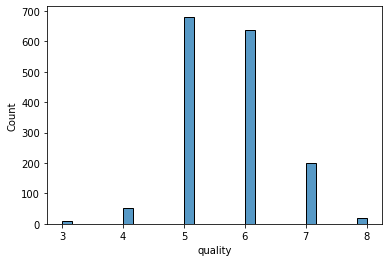

In [15]:
sns.histplot(data=split_data_red, x='quality');

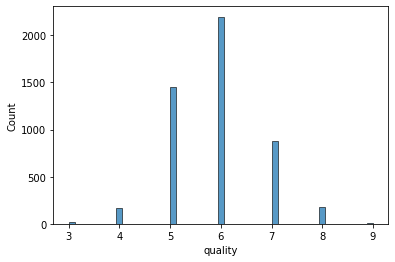

In [16]:
sns.histplot(data=split_data_white, x='quality');

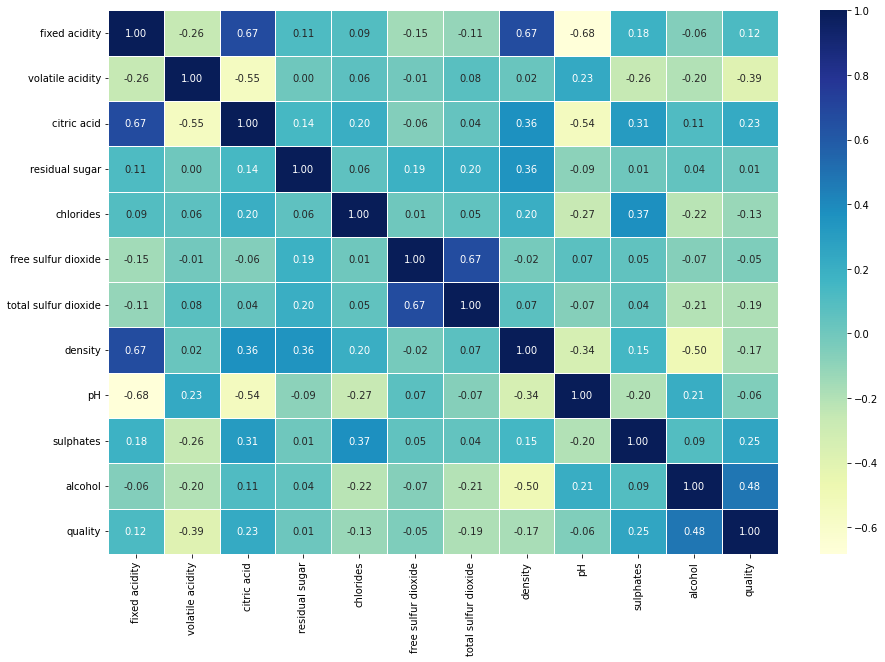

In [17]:
# Correlation matrix for independent variables

cor_matrix = split_data_red.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(cor_matrix,
                annot=True,
                linewidth=0.5,
                fmt='.2f',
                cmap='YlGnBu')

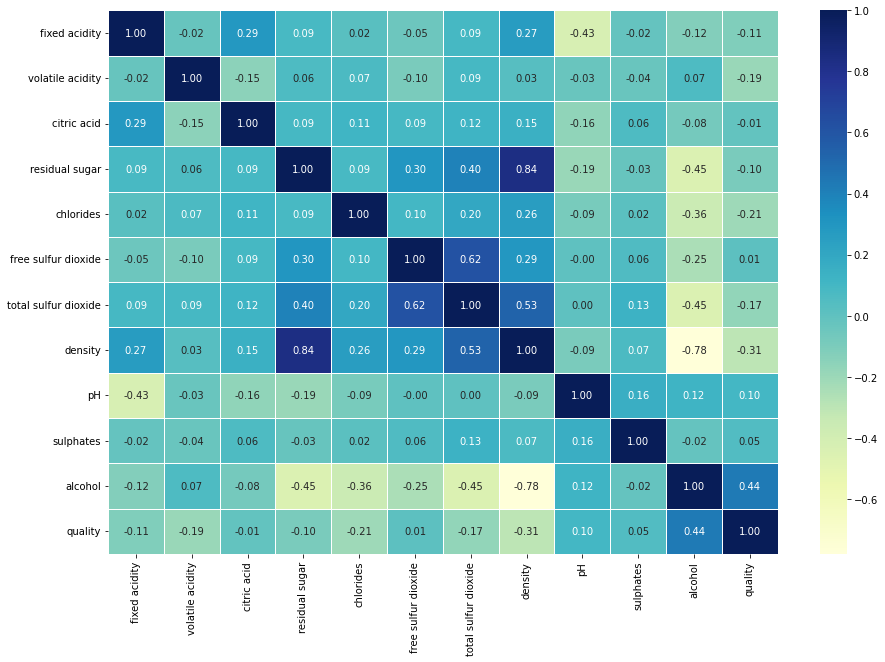

In [18]:
# Correlation matrix for independent variables

cor_matrix = split_data_white.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(cor_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')

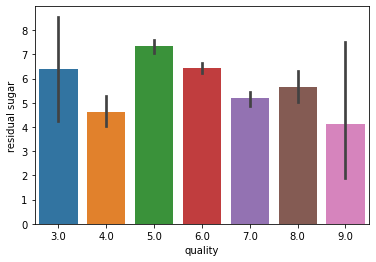

In [19]:
sns.barplot(data=split_data_white, x= 'quality', y='residual sugar');

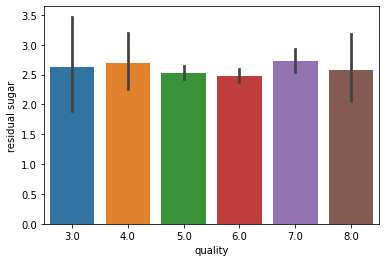

In [20]:
sns.barplot(data=split_data_red, x= 'quality', y='residual sugar');

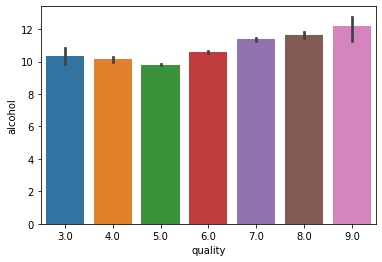

In [21]:
sns.barplot(data=split_data_white, x= 'quality', y='alcohol');

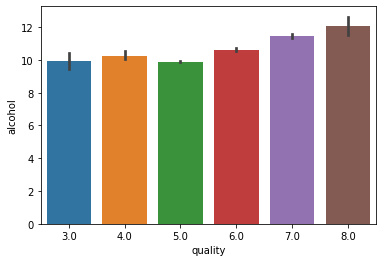

In [22]:
sns.barplot(data=split_data_red, x= 'quality', y='alcohol');

In [23]:
split_data_white.quality.mean()

5.87790935075541

In [24]:
split_data_red.quality.mean()

5.6360225140712945

####  Concatenate the red and white wine dataframes

##### To see whether anything further can be extrapolated from data

In [25]:
split_data_red['wine type'] = 'red'
split_data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red


In [26]:
split_data_white['wine type'] = 'white'
split_data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,white


In [27]:
frames = [split_data_red, split_data_white]

df_concat = pd.concat(frames)
df_concat.reset_index(drop=True, inplace=True)
df_concat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red


In [28]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   float64
 12  wine type             6497 non-null   object 
dtypes: float64(12), object(1)
memory usage: 660.0+ KB


In [29]:
df_concat.head(-5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,red
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,red
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,red
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,red
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6487,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5.0,white
6488,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6.0,white
6489,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6.0,white
6490,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6.0,white


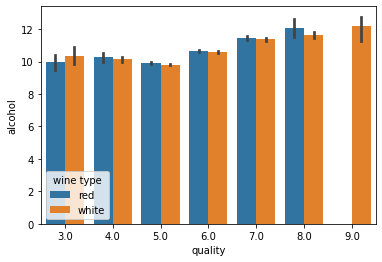

In [30]:
sns.barplot(data=df_concat, x= 'quality', y='alcohol', hue='wine type');

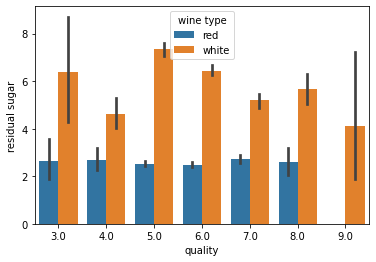

In [31]:
sns.barplot(data=df_concat, x= 'quality', y='residual sugar', hue='wine type');

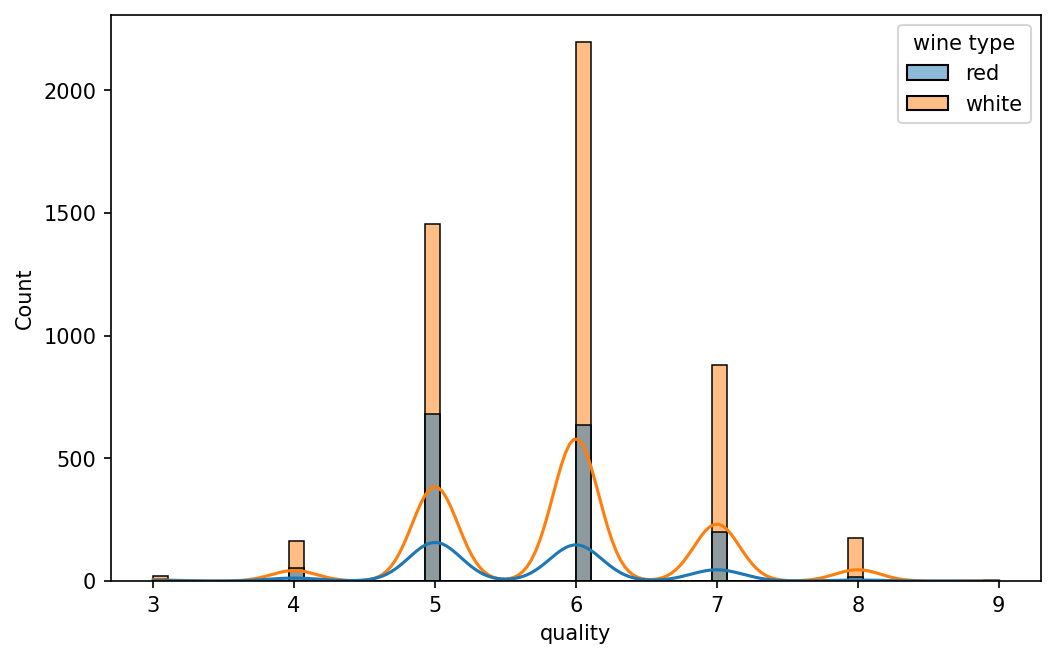

In [32]:
plt.figure(figsize=(8,5), dpi=150)
sns.histplot(data=df_concat, x='quality', hue='wine type', kde=True);

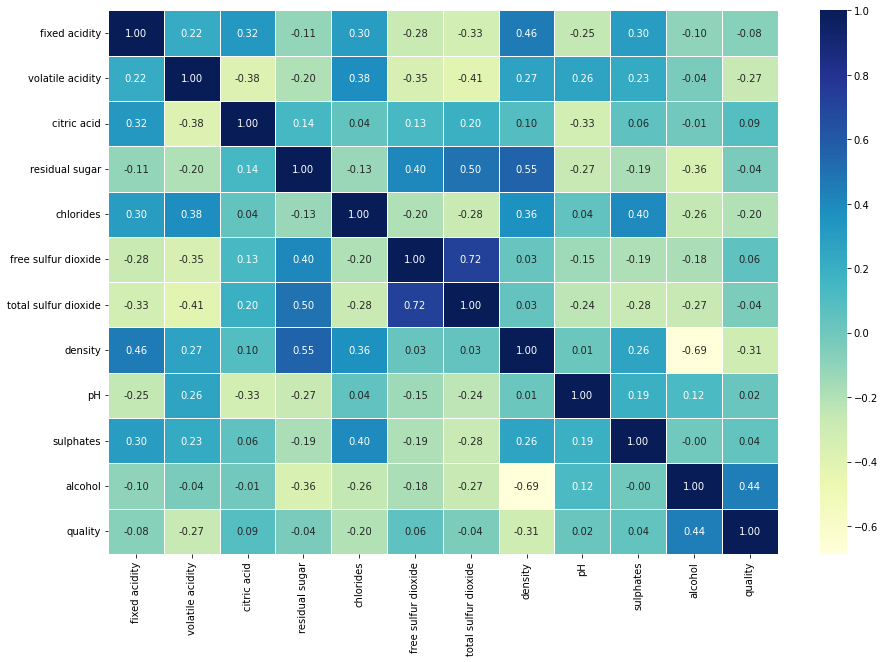

In [33]:
# Correlation matric for independent variables

cor_matrix = df_concat.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(cor_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')

## Train Test split

In [34]:
df_concat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red


In [35]:
X = pd.get_dummies(df_concat.drop('quality', axis=1),drop_first=True)
y = df_concat['quality']

In [36]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [37]:
y

0       5.0
1       5.0
2       5.0
3       6.0
4       5.0
       ... 
6492    6.0
6493    5.0
6494    6.0
6495    7.0
6496    6.0
Name: quality, Length: 6497, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Scale the data

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Regression Model

To predict wine quality

### RandomForestRegressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

reg_model = RandomForestRegressor(random_state=42)

reg_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [41]:
reg_model.score(X_train_scaled, y_train)

0.9334528286541245

In [42]:
# Create evluation function

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    '''
    Calculates root mean squared log error between predictions and true label
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create a function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train_scaled)
    test_preds = model.predict(X_test_scaled)
    scores = {"Train MAE": mean_absolute_error(y_train, train_preds),
             'Test MAE': mean_absolute_error(y_test, test_preds),
             'Test RMSLE': rmsle(y_test, test_preds),
             'Train R^2': r2_score(y_train, train_preds),
             'Test R^2': r2_score(y_test, test_preds)}
    
    return scores

In [43]:
show_scores(reg_model)

{'Train MAE': 0.15739043824701193,
 'Test MAE': 0.4341025641025641,
 'Test RMSLE': 0.09275545822476251,
 'Train R^2': 0.9334528286541245,
 'Test R^2': 0.5110550068834678}

RandomForestRegressor yielded poor R^2 value for test set.

## Tested many other models, but all of them yielded poor R^2 results for the test set

## Classification model

To predict wine quality

In [44]:
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Put models into a dictionary

models = {'logistic_regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'random_forest': RandomForestClassifier()}

# Create a function to fit & score the models
def fit_and_score(models, X_train_scaled, X_test_scaled, y_train, y_test):
    """
    Fits and evaluates given ML models.
    models: a dictionary of different sklearn models
    X_train: training data from df_train
    X_test: test data from df_train
    y_train: training data from df_train
    y_test: test data from df_train
    
    """
    # Set random seed to ensure reproducible results
    np.random.seed(42)
    # Create a dict to keep model scores
    model_scores = {}
    for name, model in models.items():
        # Fit model
        model.fit(X_train_scaled, y_train)
        # Evaluate model & append results into model_scores dict
        model_scores[name] = model.score(X_test_scaled, y_test)
    return model_scores

In [45]:
model_scores = fit_and_score(models=models,
                            X_train_scaled=X_train_scaled,
                            X_test_scaled=X_test_scaled,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/home/aapie/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic_regression': 0.5312820512820513,
 'KNN': 0.5446153846153846,
 'random_forest': 0.6779487179487179}

In [46]:
rs_rf = RandomForestClassifier(random_state=42)

In [47]:
rs_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [48]:
rs_rf.score(X_train_scaled, y_train)

1.0

In [49]:
rs_rf.score(X_test_scaled, y_test)

0.6779487179487179

In [50]:
imp_feats = pd.DataFrame(data=rs_rf.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
imp_feats

,Feature Importance
wine type_white,0.003676
fixed acidity,0.075500
citric acid,0.080053
pH,0.083942
residual sugar,0.084584
free sulfur dioxide,0.085090
chlorides,0.085440
sulphates,0.086449
total sulfur dioxide,0.090192
density,0.099918


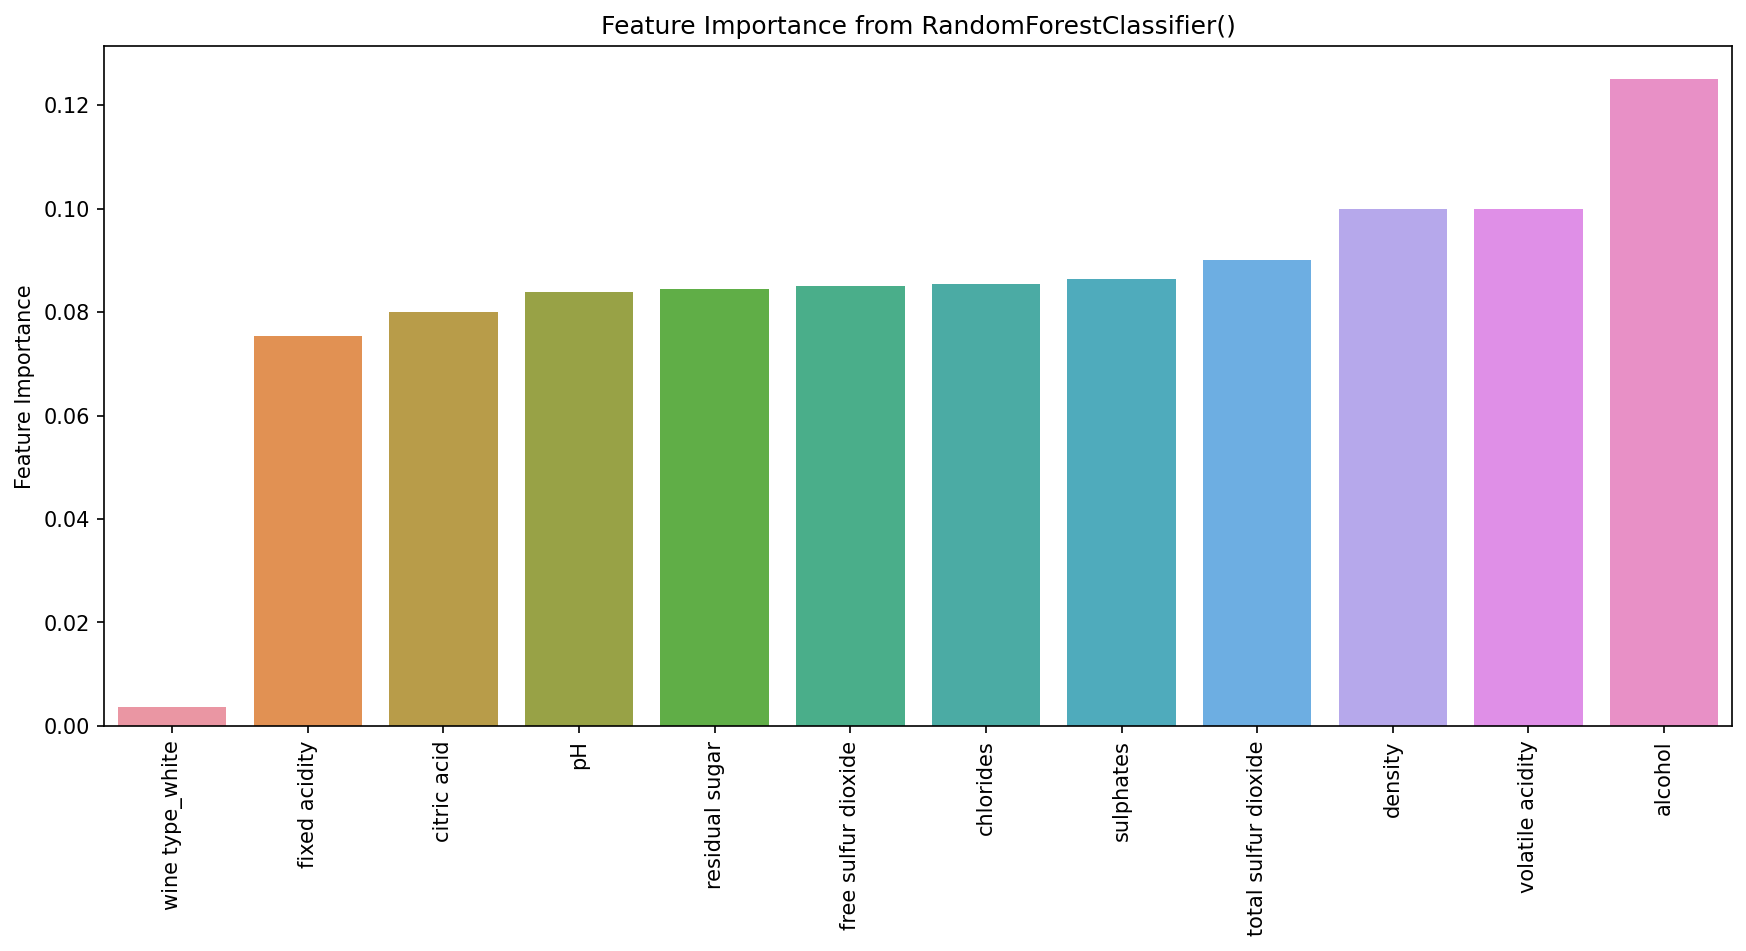

In [51]:
plt.figure(figsize=(14, 6), dpi=150)
sns.barplot(data=imp_feats, x=imp_feats.index, y='Feature Importance')
plt.xticks(rotation=90)
plt.title('Feature Importance from RandomForestClassifier()');

In [52]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

y_preds = rs_rf.predict(X_test_scaled)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         5
         4.0       0.88      0.19      0.32        36
         5.0       0.66      0.72      0.69       294
         6.0       0.66      0.75      0.70       450
         7.0       0.76      0.59      0.66       161
         8.0       0.91      0.34      0.50        29

    accuracy                           0.68       975
   macro avg       0.64      0.43      0.48       975
weighted avg       0.69      0.68      0.67       975



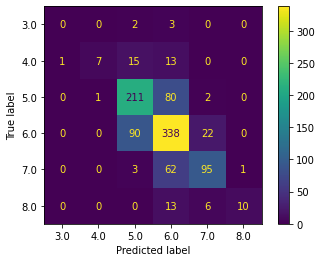

In [53]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

Test data R^2 is 67.8%, which is still quite low, but no suitable alternative model could be identified

## Model to predict wine type (red/ white)

In [64]:
X = df_concat.drop('wine type', axis=1)
y = pd.get_dummies(df_concat['wine type'], drop_first=True).values.ravel()

In [65]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


In [66]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [67]:
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


# Scale data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
model_scores_2 = fit_and_score(models=models,
                              X_train_scaled=X_train_scaled,
                              X_test_scaled=X_test_scaled,
                              y_train=y_train,
                              y_test=y_test)

model_scores_2

{'logistic_regression': 0.9876923076923076,
 'KNN': 0.9856410256410256,
 'random_forest': 0.9938461538461538}

In [69]:
rs_rf_2 = RandomForestClassifier(random_state=42)
rs_rf_2.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [70]:
imp_feats_2 = pd.DataFrame(data=rs_rf_2.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
imp_feats_2

,Feature Importance
quality,0.002768
alcohol,0.009660
citric acid,0.014945
pH,0.021198
residual sugar,0.040735
fixed acidity,0.042431
sulphates,0.057791
density,0.057877
free sulfur dioxide,0.059850
volatile acidity,0.142884


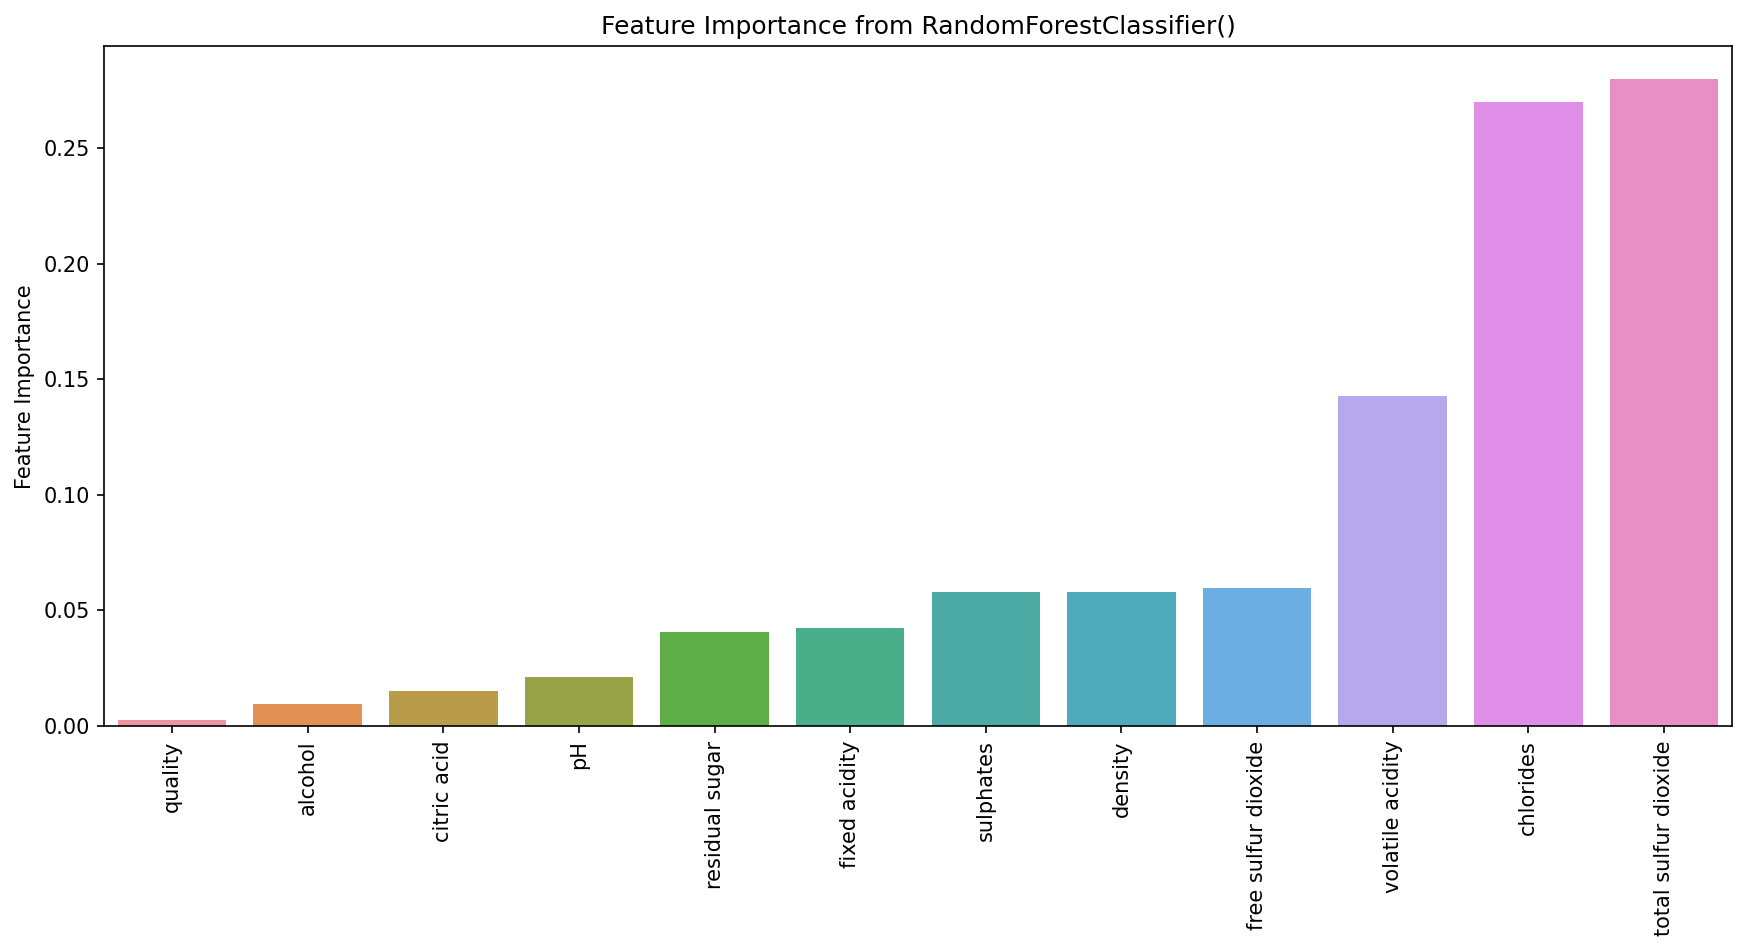

In [71]:
plt.figure(figsize=(14, 6), dpi=150)
sns.barplot(data=imp_feats_2, x=imp_feats_2.index, y='Feature Importance')
plt.xticks(rotation=90)
plt.title('Feature Importance from RandomForestClassifier()');

In [72]:
y_preds = rs_rf_2.predict(X_test_scaled)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       260
           1       0.99      1.00      1.00       715

    accuracy                           0.99       975
   macro avg       0.99      0.99      0.99       975
weighted avg       0.99      0.99      0.99       975



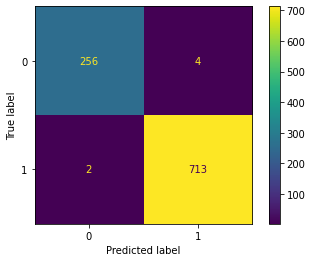

In [73]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);